# 

In [1]:
import pandas as pd

In [42]:
file_path = "/home/shariya/pandas-practice-task/orders.csv"
data = pd.read_csv(file_path)
print(data.to_string(index=False))

 order_id      customer    product  quantity  price       date
        1 Michael Scott     Laptop         3   1769 2024-05-10
        2    Sam Wilson     Camera         4    605 2024-07-08
        3    Nina Lopez    Printer         3    543 2023-09-23
        4   Tina Brooks Headphones         2   1462 2023-03-09
        5 George Miller   Keyboard         2   1082 2023-03-27
        6    Ethan Hunt     Laptop         3   1536 2023-06-01
        7 Alice Johnson Headphones         2   1224 2024-02-17
        8     Bob Smith Headphones         4   1334 2025-01-02
        9   Jane Foster      Mouse         5    833 2023-03-08
       10   Jane Foster Headphones         3    106 2023-07-13
       11  Kevin Turner    Monitor         3    110 2023-04-15
       12    Laura Hill    Printer         2   1643 2023-01-09
       13    Oscar Reed     Laptop         1    665 2025-03-21
       14 George Miller   Keyboard         1   1559 2025-05-08
       15    Nina Lopez     Laptop         3    945 202

In [7]:
total_revenue= data["price"].sum()
print(totalrevenue)

207504


In [36]:

top_customers = data.sort_values(by="price", ascending=False)

print("\n the top 5 customers by spending.:\n", top_customers.head())


 the top 5 customers by spending.:
      order_id       customer     product  quantity  price        date
48         49  Michael Scott      Camera         3   2000  2025-08-14
157       158  Alice Johnson       Mouse         3   1989  2024-02-16
92         93    Jane Foster  Smartwatch         1   1988  2025-03-30
153       154     Oscar Reed  Smartphone         5   1968  2024-07-13
23         24  Michael Scott     Printer         5   1963  2023-03-03


In [44]:
print(data)
data["date"] = pd.to_datetime(data["date"])
data["amount"] = data["quantity"] * data["price"]

# small dataset 
# per_month_sales = data.groupby(data["date"].dt.to_period("M"))["quantity"].sum()


monthly_revenue = data["amount"].resample("M").sum()

print(monthly_revenue.head())



     order_id       customer     product  quantity  price        date
0           1  Michael Scott      Laptop         3   1769  2024-05-10
1           2     Sam Wilson      Camera         4    605  2024-07-08
2           3     Nina Lopez     Printer         3    543  2023-09-23
3           4    Tina Brooks  Headphones         2   1462  2023-03-09
4           5  George Miller    Keyboard         2   1082  2023-03-27
..        ...            ...         ...       ...    ...         ...
195       196     Oscar Reed  Smartwatch         3    291  2024-07-02
196       197   Kevin Turner    Keyboard         2    146  2024-10-08
197       198   Quincy Baker      Laptop         3   1570  2024-02-16
198       199     Ian Wright      Camera         4   1823  2025-08-06
199       200     Laura Hill     Monitor         5    666  2025-01-26

[200 rows x 6 columns]
date
2023-01-31    36
2023-02-28     9
2023-03-31    37
2023-04-30    10
2023-05-31    13
Freq: ME, Name: quantity, dtype: int64


In [53]:
file_path = "/home/shariya/pandas-practice-task/transactions.csv"
transections = pd.read_csv(file_path)
print(transections.to_string(index=False))

 id account_no   type  amount       date
  1   ACC00012  debit   -3465 2025-02-21
  2   ACC00004  debit    4040 2025-05-05
  3   ACC00031  debit    2951 2023-06-07
  4   ACC00046 credit    4122 2025-05-18
  5   ACC00012  debit    4495 2023-04-21
  6   ACC00013  debit    3915 2023-09-02
  7   ACC00004 credit     602 2024-04-28
  8   ACC00004  debit    -411 2023-08-14
  9   ACC00005 credit   -1177 2025-05-12
 10   ACC00037 credit   -3373 2024-08-11
 11   ACC00022 credit    2095 2024-09-22
 12   ACC00021 credit    4318 2024-04-13
 13   ACC00008 credit    1238 2023-06-12
 14   ACC00010 credit    4024 2023-03-05
 15   ACC00012  debit    3862 2025-01-09
 16   ACC00029 credit    3021 2023-07-05
 17   ACC00007  debit    1689 2023-12-27
 18   ACC00024 credit    4310 2023-12-23
 19   ACC00044 credit    3794 2024-05-14
 20   ACC00006 credit    3068 2023-10-01
 21   ACC00037  debit    1866 2024-03-04
 22   ACC00030  debit    1918 2023-05-16
 23   ACC00025  debit   -2193 2023-04-20
 24   ACC00049  

In [52]:

total_credit_per_account = transections[transections["type"] == "credit"].groupby("account_no")["amount"].sum()
total_debit_per_account = transections[transections["type"] == "debit"].groupby("account_no")["amount"].sum()
print(total_credit_per_account)
print(total_debit_per_account)

account_no
ACC00002    15042
ACC00003     7359
ACC00004     5331
ACC00005     2692
ACC00006     7558
ACC00007     2900
ACC00008     8432
ACC00009     4813
ACC00010     4302
ACC00011     2147
ACC00013     6884
ACC00014      278
ACC00015     5124
ACC00017     5744
ACC00018     7083
ACC00019     7621
ACC00020     1961
ACC00021     3991
ACC00022     2077
ACC00023     5081
ACC00024     7304
ACC00027     8025
ACC00028     7643
ACC00029     7182
ACC00030    12970
ACC00032     4563
ACC00034     7182
ACC00035     4676
ACC00036    11044
ACC00037     7628
ACC00038     3349
ACC00040     9210
ACC00041     2484
ACC00042     2527
ACC00043    10231
ACC00044     7351
ACC00045     8846
ACC00046     9234
ACC00047     1261
ACC00048     2754
ACC00049     5488
ACC00050     8236
Name: amount, dtype: int64
account_no
ACC00001     7575
ACC00002     6992
ACC00004      666
ACC00005     9715
ACC00006     6856
ACC00007     3044
ACC00008     4934
ACC00009     9221
ACC00010     4883
ACC00011     1510
ACC00012     27

In [54]:
negetive_balance_account = transections[transections["amount"]< 0]
print(negetive_balance_account["account_no"])

0      ACC00012
7      ACC00004
8      ACC00005
9      ACC00037
22     ACC00025
25     ACC00047
34     ACC00005
45     ACC00031
57     ACC00050
59     ACC00020
67     ACC00008
73     ACC00014
91     ACC00040
101    ACC00037
113    ACC00041
122    ACC00018
138    ACC00037
146    ACC00048
153    ACC00046
156    ACC00045
158    ACC00025
166    ACC00044
168    ACC00021
169    ACC00041
174    ACC00036
181    ACC00009
182    ACC00038
187    ACC00022
Name: account_no, dtype: object


In [64]:
# top_highest_transection = transections.sort_values(by="amount", ascending=False)
# print(top_highest_transection.head(3))
top_3 = transections.nlargest(3, "amount")

print(top_3)


    id account_no    type  amount        date
97  98   ACC00019   debit    4989  2024-08-14
74  75   ACC00016   debit    4951  2023-11-21
65  66   ACC00003  credit    4946  2023-01-22


In [68]:
file_path = "/home/shariya/pandas-practice-task/covid19.csv"
covid_data = pd.read_csv(file_path)
print(covid_data.head())

  Date_reported Country_code     Country WHO_region  New_cases  \
0    2020-01-04           AI    Anguilla        AMR        NaN   
1    2020-01-04           AZ  Azerbaijan        EUR        NaN   
2    2020-01-04           BD  Bangladesh       SEAR        0.0   
3    2020-01-04           BB    Barbados        AMR        NaN   
4    2020-01-04           BR      Brazil        AMR        NaN   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0         NaN                  0  
1                 0         NaN                  0  
2                 0         0.0                  0  
3                 0         NaN                  0  
4                 0         NaN                  0  


In [79]:
# total_cases_per_country = (
#     covid_data.groupby("Country", as_index=False)["Cumulative_cases"].max()
# )

# print(total_cases_per_country.head())

total_cases_per_country = covid_data.groupby("Country", as_index=False)["Cumulative_cases"].max()

bangladesh_data = total_cases_per_country[total_cases_per_country["Country"] == "Bangladesh"]

print(total_cases_per_country)


                                               Country  Cumulative_cases
0                                          Afghanistan            235214
1                                              Albania            337202
2                                              Algeria            272394
3                                       American Samoa              8359
4                                              Andorra             48015
..                                                 ...               ...
235                                  Wallis and Futuna              3760
236                                              Yemen             11945
237                                             Zambia            349892
238                                           Zimbabwe            266434
239  occupied Palestinian territory, including east...            703228

[240 rows x 2 columns]


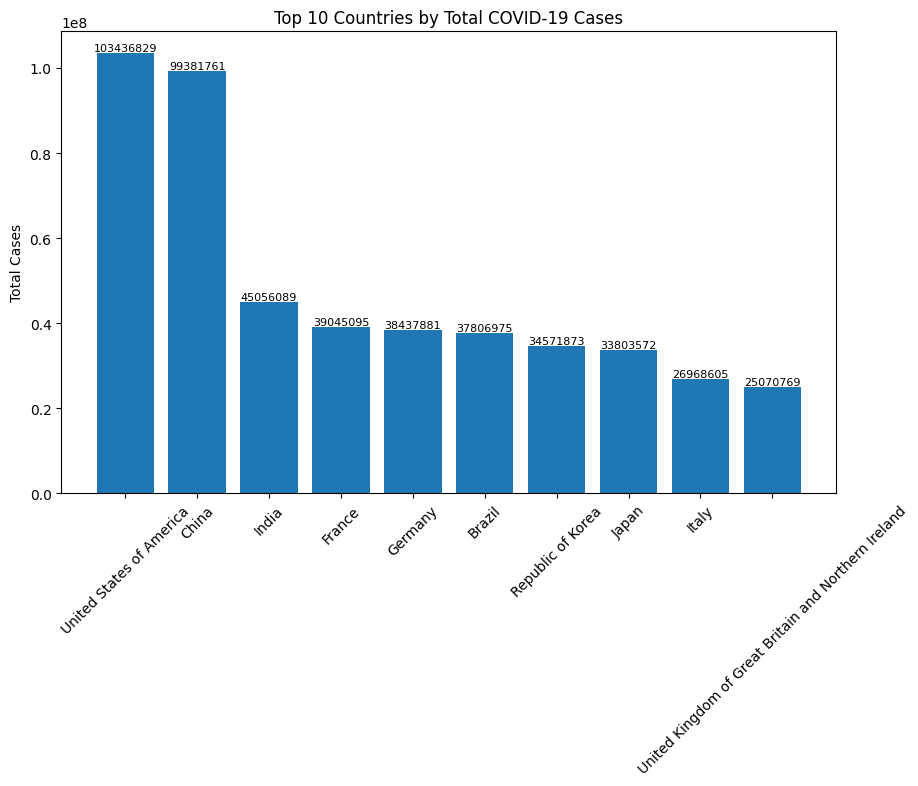

In [92]:
import matplotlib.pyplot as plt

total_cases = covid_data.groupby("Country")["Cumulative_cases"].max().sort_values(ascending=False).head(10)
# total_cases.plot(kind="bar", figsize=(10,6))
# plt.title("Top 10 Countries by Total COVID-19 Cases")
# plt.ylabel("Total Cases")
# plt.xticks(rotation=45)
# plt.show()


plt.figure(figsize=(10,6))
plt.bar(total_cases.index, total_cases.values)  # values instead of normalized
plt.title("Top 10 Countries by Total COVID-19 Cases")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)

# Show actual numbers above bars
for i, v in enumerate(total_cases.values):
    plt.text(i, v, str(v), ha="center", va="bottom", fontsize=8)

plt.show()

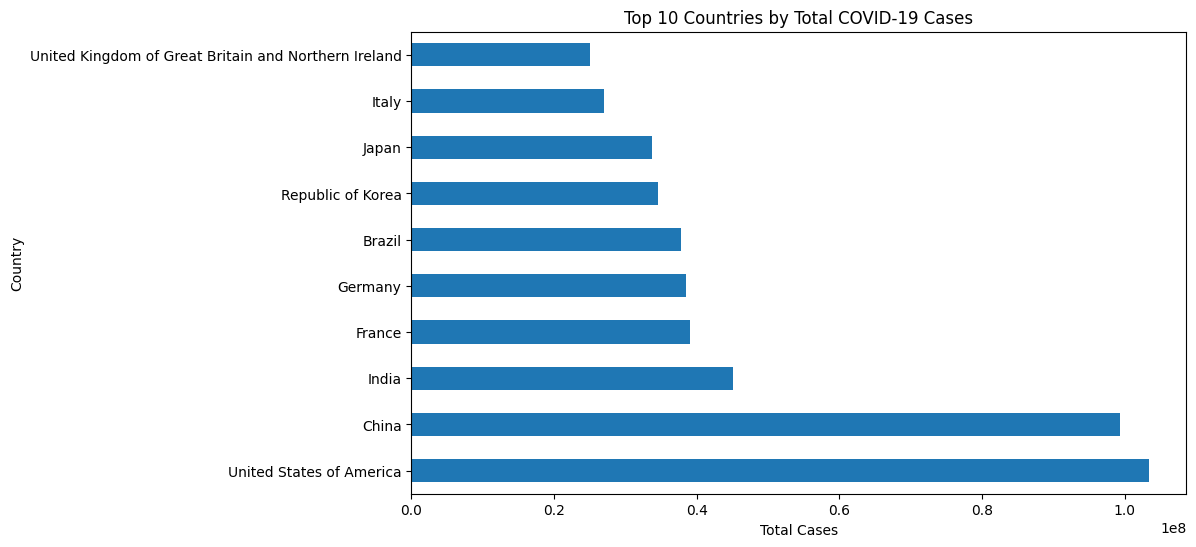

In [84]:
total_cases.head(10).plot(kind="barh", figsize=(10,6))
plt.title("Top 10 Countries by Total COVID-19 Cases")
plt.xlabel("Total Cases")
plt.show()


In [94]:
covid_data["Estimated_Recovered"] = covid_data["Cumulative_cases"] - covid_data["Cumulative_deaths"]
covid_data["Recovery_Rate"] = (covid_data["Estimated_Recovered"] / covid_data["Cumulative_cases"]) * 100


print(covid_data[["Country", "Date_reported", "Cumulative_cases", "Cumulative_deaths", "Estimated_Recovered", "Recovery_Rate"]].tail())

                                 Country Date_reported  Cumulative_cases  \
497755              Syrian Arab Republic    2025-09-07             57423   
497756                         Sri Lanka    2025-09-07            672812   
497757  Saint Vincent and the Grenadines    2025-09-07              9674   
497758                           Senegal    2025-09-07             89407   
497759                            Rwanda    2025-09-07            133273   

        Cumulative_deaths  Estimated_Recovered  Recovery_Rate  
497755               3163                54260      94.491754  
497756              16907               655905      97.487114  
497757                124                 9550      98.718214  
497758               1972                87435      97.794356  
497759               1468               131805      98.898502  


In [101]:

covid_data["Date_reported"] = pd.to_datetime(covid_data["Date_reported"])

top_countries = covid_data.groupby("Country")["Cumulative_cases"].max().sort_values(ascending=False).head(3)
print(top_countries)


Country
United States of America    103436829
China                        99381761
India                        45056089
Name: Cumulative_cases, dtype: int64


In [109]:
top_countries_data = covid_data[covid_data["Country"].isin(top_countries.index)]
top_data = top_countries_data.sort_values(["Country", "Date_reported"])
print(top_countries_data)

       Date_reported Country_code                   Country WHO_region  \
15        2020-01-04           IN                     India       SEAR   
41        2020-01-04           US  United States of America        AMR   
191       2020-01-04           CN                     China        WPR   
297       2020-01-05           CN                     China        WPR   
419       2020-01-05           US  United States of America        AMR   
...              ...          ...                       ...        ...   
497322    2025-09-06           US  United States of America        AMR   
497472    2025-09-06           CN                     China        WPR   
497576    2025-09-07           CN                     China        WPR   
497699    2025-09-07           US  United States of America        AMR   
497733    2025-09-07           IN                     India       SEAR   

        New_cases  Cumulative_cases  New_deaths  Cumulative_deaths  \
15            0.0                 0      

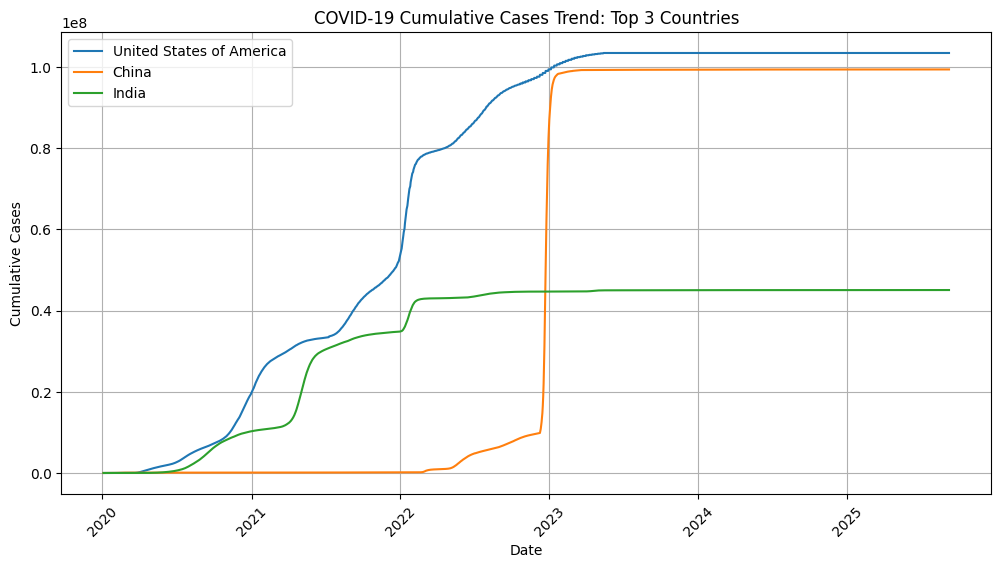

In [113]:
plt.figure(figsize=(12,6))

for country in top_countries.index:
    country_data = top_data[top_data["Country"] == country]
    plt.plot(country_data["Date_reported"], country_data["Cumulative_cases"], label=country)

plt.title("COVID-19 Cumulative Cases Trend: Top 3 Countries")
plt.xlabel("Date")
plt.ylabel("Cumulative Cases")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()